In [1]:
# Bu proje boyunca, kaggle.com/datasets adresinden erişilen, bir bankanın müşteri kaybına dair oluşturulan veri seti incelenmiştir
# https://www.kaggle.com/datasets/santoshd3/bank-customers
# Bu projede data temizlenmiş, probleme uygun metodlar uygulanmış ve daha sonra metodların sonuçları karşılaştırılmıştır
# Bu proje, Şakir Ardıl ACAR tarafından hazırlanmıştır

## **Feature Engineering**

In [2]:
# Machine Learning modelleri eksik veri bulundurmamalıdır
# Veri setleri kategorik ve numerik olarak iki grupta incelenir. 
# Scikit-learn, kategorik verilerin numerik değerlere dönüştürülmesi gerektirir

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Tabloyu okumak için numpy ve pandas kütüphaneleri, illustrate etmek için matplotlib kütüphanesi import edilmiştir
# Kısaltma olarak np, pd ve plt genel kullanımdır

In [5]:
churn = pd.read_csv(r"C:\Users\ardil\OneDrive\Masaüstü\churn.csv")
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# Tablodan elde edilen veriler:
# Banka müşterisinin kim olduğunu içeren bilgiler (Customer ID, surname)
# Kişisel bilgiler (Geography, Gender, Age)
# Finansal bilgileri (CreditScore, Balance, Estimated Salary)
# Banka ile ilişkisi (Tenure, Balance, NumOfProduct, HasCrCard, IsActiveMember)
# Banka müşterisi mi (Exited)
# Exited 1 ise müşteri bir dönem banka ile ilişkisini kesmiş, 0 ise kesmemiştir


In [6]:
# Tabloda hem index sırası hem RowNumber bulunmaktadır, bu karmaşaya sebep verebilir, bu sebeple RowNumber index'e taşınmalıdır
churn = pd.read_csv("churn.csv", index_col = 0); churn # RowNumber 0. sırada [0, 1, ...]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [7]:
# Column'ların hangi data tipinde yüklendiğinin kontrol edilmesi için

churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Hangi data tipinde tabloya girildiğine bakıldığında, column'ların uygun data tiplerinde olduğu görülür

In [9]:
# Tabloda eksik veri olup olmadığı kontrol edilmelidir

churn.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Tabloda eksik veri bulunmamaktadır

In [11]:
# Tabloda bulunan gender ve geography column'ları kategorik değişkenlerdir
# Scikit-learn kütüphanesi numeric verilerle çalışmaktadır
# Bu sebeple output'u etkileyebilecek bu feature'lar numeric verilere dönüştürülmelidir

In [12]:
# Gender column'u female ve male'lerden oluşmaktadır. Bu sebeple dummy function'ı kullanmak takibini kolaylaştıracaktır

In [13]:
dummy_gender = pd.get_dummies(churn['Gender'])

In [14]:
churn = pd.concat([churn, dummy_gender], axis=1); churn # dummy_gender column'u churn tablosuna eklenmiştir

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0


In [15]:
unique_values = churn['Geography'].unique(); unique_values 

array(['France', 'Spain', 'Germany'], dtype=object)

In [16]:
# Görüldüğü üzere Geography sütunu France, Spain ve Germany değerlerinden oluşmaktadır
# 1 = France, 2 = Spain, 3 = Germany olarak değer atanıp numeric kodlanabilir

In [17]:
geography_France =  (churn['Geography'] == 'France')
churn.loc[churn['Geography'] == 'France', 'Geography'] = '1'
geography_Sapain =  (churn['Geography'] == 'Spain')
churn.loc[churn['Geography'] == 'Spain', 'Geography'] = '2'
geography_Germany =  (churn['Geography'] == 'Germany')
churn.loc[churn['Geography'] == 'Germany', 'Geography'] = '3'; churn

# Burada yapılan churn tablosunda Geography column'unda ilgili ülkeyi al
# Bu ülkenin bulunduğu index'i atanan numara isimlendirme ile değiştir

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male
RowNumber,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,1,Female,42,2,0.00,1,1,1,101348.88,1,1,0
2,15647311,Hill,608,2,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
3,15619304,Onio,502,1,Female,42,8,159660.80,3,1,0,113931.57,1,1,0
4,15701354,Boni,699,1,Female,39,1,0.00,2,0,0,93826.63,0,1,0
5,15737888,Mitchell,850,2,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,1,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9997,15569892,Johnstone,516,1,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9998,15584532,Liu,709,1,Female,36,7,0.00,1,0,1,42085.58,1,1,0


In [18]:
churn.Geography = churn.Geography.astype('float64') # Numeric veri tipi olarak değiştirildi

In [19]:
churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography          float64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Female               uint8
Male                 uint8
dtype: object

In [20]:
selected_columns = ['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Female']  
churn = churn[selected_columns]; churn
# Kullanılacak tablonun son hali 
# Female ile male yüksek kolerasyon içinde bulunduğundan birlikte kullanılmamalıdır

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female
RowNumber,,,,,,,,,,,
1,619,1.0,42,2,0.00,1,1,1,101348.88,1,1
2,608,2.0,41,1,83807.86,1,0,1,112542.58,0,1
3,502,1.0,42,8,159660.80,3,1,0,113931.57,1,1
4,699,1.0,39,1,0.00,2,0,0,93826.63,0,1
5,850,2.0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,1.0,39,5,0.00,2,1,0,96270.64,0,0
9997,516,1.0,35,10,57369.61,1,1,1,101699.77,0,0
9998,709,1.0,36,7,0.00,1,0,1,42085.58,1,1


In [21]:
churn.describe().T # Takibinin kolay olması açısından Transpose'u alınmıştır

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,1.749500,0.830433,1.00,1.00,1.000,3.0000,3.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Text(0, 0.5, 'Miktar')

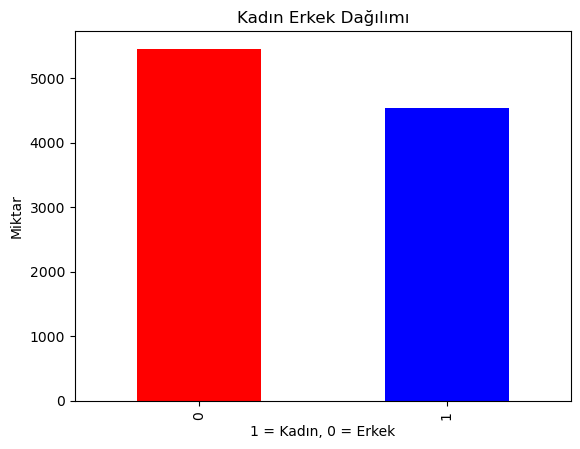

In [22]:
churn["Female"].value_counts().plot(kind="bar",color=["red", "blue"]);
plt.title("Kadın Erkek Dağılımı")
plt.xlabel("1 = Kadın, 0 = Erkek")
plt.ylabel("Miktar")

In [23]:
churn.Female.value_counts()

0    5457
1    4543
Name: Female, dtype: int64

Text(0, 0.5, 'Miktar')

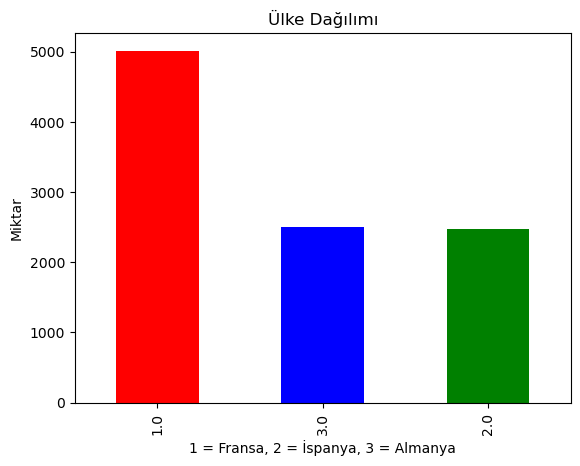

In [24]:
churn["Geography"].value_counts().plot(kind="bar",color=["red", "blue", "green"]);
plt.title("Ülke Dağılımı")
plt.xlabel("1 = Fransa, 2 = İspanya, 3 = Almanya")
plt.ylabel("Miktar")

In [25]:
churn.Geography.value_counts()

1.0    5014
3.0    2509
2.0    2477
Name: Geography, dtype: int64

C:\Users\ardil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

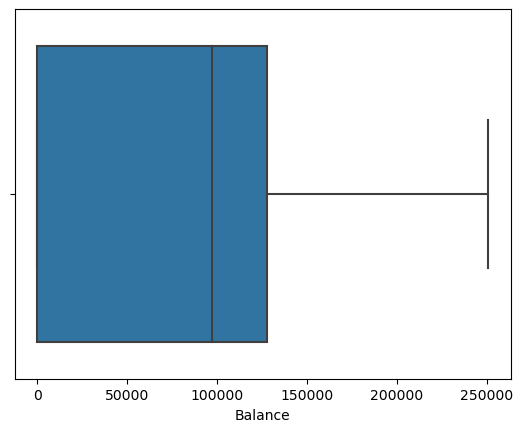

In [26]:
import seaborn as sns

sns.boxplot(churn['Balance']) # Hesaplardaki para miktarının analizinin görselleştirilmesi

Text(0, 0.5, 'Miktar')

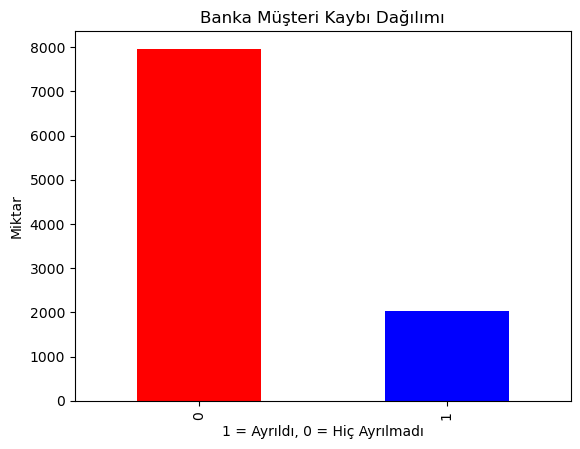

In [27]:
churn["Exited"].value_counts().plot(kind="bar",color=["red", "blue"]);
plt.title("Banka Müşteri Kaybı Dağılımı")
plt.xlabel("1 = Ayrıldı, 0 = Hiç Ayrılmadı")
plt.ylabel("Miktar")

In [28]:
churn.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [29]:
churn.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [30]:
churn.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

C:\Users\ardil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EstimatedSalary'>

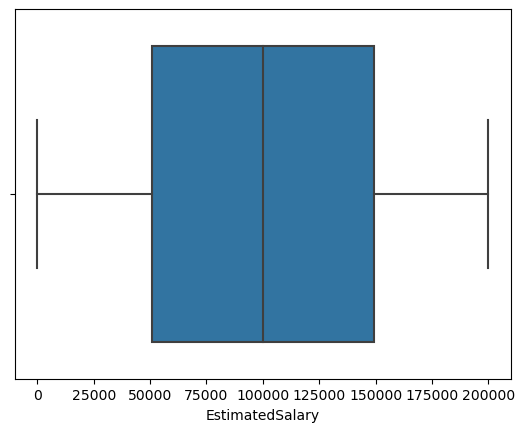

In [31]:
import seaborn as sns

sns.boxplot(churn['EstimatedSalary']) # Yaklaşık maaş tahminin görselleştirilmesi

## **Machine Learning**

In [32]:
# Bankanın elinde hesaptaki para miktarı, sahip olunan kart adeti gibi veriler mevcuttur
# Banka, eldeki verilere göre müşterinin daha önce hiç banka ile ilişiğini kesip kesmediğinin analizini yapmaktadır
# Exited 1 ve 0 olarak kategorize edilmiştir
# Eldeki problem bir "classification" problemidir
# "Classification" problemlerini analiz etmek için "Logistic Regression", "KNN", "Classification Trees" gibi methodlar kullanılabilir

Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve

In [7]:
import mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [35]:
# Feature Selection ile modelin en iyi çalıştığı feature'lar bulunur
# Best Subset selection
# Forward to backward selection
# Backward to forward selection kullanılacak feature belirleme yöntemleridir

In [36]:
y = churn['Exited']; y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [37]:
X = churn.drop('Exited',axis=1); X

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female
RowNumber,,,,,,,,,,
1,619,1.0,42,2,0.00,1,1,1,101348.88,1
2,608,2.0,41,1,83807.86,1,0,1,112542.58,1
3,502,1.0,42,8,159660.80,3,1,0,113931.57,1
4,699,1.0,39,1,0.00,2,0,0,93826.63,1
5,850,2.0,43,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...
9996,771,1.0,39,5,0.00,2,1,0,96270.64,0
9997,516,1.0,35,10,57369.61,1,1,1,101699.77,0
9998,709,1.0,36,7,0.00,1,0,1,42085.58,1


In [38]:
# train ve test olarak ayrılır

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train-test 20% - 80% olarak ayrıldı
# stratify ile denge korundu

In [39]:
# Best subset selection

# "estimator" hangi modelin kullanılacağını söyler
# "min feature" en az kullanılacak feature sayısı
# "max feature" en fazla kullanılacak feature sayısı
# "scoring" hangi değerlendirme metriği kullanılacak
# "print progress" ara basamakları yazdır
# "cv" cross validation
# 

logmodel = LogisticRegression(max_iter=1000,penalty='none')
efs = EFS(logmodel, 
           min_features=1,
           max_features=10,
           scoring='accuracy',
           print_progress=True,
           cv=5,
           n_jobs=-1)   # tüm çekirdekler kullanıldı, her bir basamakta 5 defa cross validation yapıldı

feature_names =( 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
               'IsActiveMember', 'EstimatedSalary', 'Female')
efs = efs.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)


Features: 1023/1023

Best accuracy score: 0.81
Best subset (indices): (1, 2, 5, 7)
Best subset (corresponding names): ('Geography', 'Age', 'NumOfProducts', 'IsActiveMember')


In [40]:
# Sonuç olarak "Geography", "Age", "NumOfProducts" ve "IsActiveMember", kullanılması en ideal feature'lardır
# Skor 0.81'dir

In [41]:
efs.subsets_ # Her basamakta teker teker neler yaptığını görmek için kullanılmalıdır

{0: {'feature_idx': (0,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('Geography',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.77625 , 0.770625, 0.7725  , 0.77375 , 0.77875 ]),
  'avg_score': 0.774375,
  'feature_names': ('Age',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('Tenure',)},
 4: {'feature_idx': (4,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('Balance',)},
 5: {'feature_idx': (5,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('NumOfProducts',)},
 6: {'feature_idx': (6,),
  'cv_scores': array([0.79625, 0.79625, 0.7

In [42]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore,)",0.0,0.0,0.0
1,"(1,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Geography,)",0.0,0.0,0.0
2,"(2,)","[0.77625, 0.770625, 0.7725, 0.77375, 0.77875]",0.774375,"(Age,)",0.003664,0.00285,0.001425
3,"(3,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Tenure,)",0.0,0.0,0.0
4,"(4,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Balance,)",0.0,0.0,0.0
...,...,...,...,...,...,...,...
1018,"(0, 1, 2, 4, 5, 6, 7, 8, 9)","[0.785, 0.796875, 0.790625, 0.79375, 0.785625]",0.790375,"(CreditScore, Geography, Age, Balance, NumOfPr...",0.005894,0.004586,0.002293
1019,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
1020,"(0, 2, 3, 4, 5, 6, 7, 8, 9)","[0.785, 0.796875, 0.788125, 0.793125, 0.785]",0.789625,"(CreditScore, Age, Tenure, Balance, NumOfProdu...",0.006024,0.004687,0.002344
1021,"(1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Geography, Age, Tenure, Balance, NumOfProduct...",0.0,0.0,0.0


In [43]:
# En değerli feature'lar ile model kurulur

logmodel=LogisticRegression(max_iter=1000)
X_train_selected=X_train.iloc[:,[1,2,5,7]]
X_test_selected=X_test.iloc[:,[1,2,5,7]]
logmodel.fit(X_train_selected, y_train)
score = logmodel.score(X_test_selected, y_test)
print(score)

0.8205


In [44]:
# Best Model Selection ile "Accuracy" scoru 0.82'dir

In [45]:
# Forward to backward

logmodel = LogisticRegression(max_iter=1000,penalty='none')
sfs = SFS(logmodel, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
         n_jobs=-1)
feature_names = ('CreditScore', 'Geography', 'Age', 'Tenure', 'Balance','NumOfProduct','HasCrCard',
                 'IsActiveMember', 'EstimatedSalary', 'Female')
sfs = sfs.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2023-02-14 14:33:52] Features: 1/10 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.2s finished

[2023-02-14 14:33:53] Features: 2/10 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.2s finished

[2023-02-14 14:33:53] Features: 3/10 -- sco

NOT!

print('Best accuracy score: %.2f' % sfs.best_score_)
print('Best subset (indices):', sfs.best_idx_)
print('Best subset (corresponding names):', sfs.best_feature_names_)

satırları eklendiğinde

'SequentialFeatureSelector' object has no attribute 'best_score_'

Hatası alınır


In [46]:
sfs.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore',)},
 2: {'feature_idx': (0, 1),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore', 'Geography')},
 3: {'feature_idx': (0, 1, 3),
  'cv_scores': array([0.79625 , 0.79625 , 0.796875, 0.79625 , 0.79625 ]),
  'avg_score': 0.796375,
  'feature_names': ('CreditScore', 'Geography', 'Tenure')},
 4: {'feature_idx': (0, 1, 3, 4),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore', 'Geography', 'Tenure', 'Balance')},
 5: {'feature_idx': (0, 1, 3, 4, 5),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore',
   'Geography',
   'Tenure',
   'Balance',
   'NumOfProducts')},
 6: {'feature_idx': (0, 1, 3, 4, 5, 6),
  'cv_scores':

In [47]:
# En iyi score 0.7963'tür
# Credit Score, Gepgraphy ve Tenure feature'ları ile elde edilmiştir

In [48]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore,)",0.0,0.0,0.0
2,"(0, 1)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography)",0.0,0.0,0.0
3,"(0, 1, 3)","[0.79625, 0.79625, 0.796875, 0.79625, 0.79625]",0.796375,"(CreditScore, Geography, Tenure)",0.000321,0.00025,0.000125
4,"(0, 1, 3, 4)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance)",0.0,0.0,0.0
5,"(0, 1, 3, 4, 5)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
6,"(0, 1, 3, 4, 5, 6)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
7,"(0, 1, 3, 4, 5, 6, 8)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
8,"(0, 1, 3, 4, 5, 6, 8, 9)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.785, 0.796875, 0.789375, 0.79375, 0.785]",0.79,"(CreditScore, Geography, Age, Tenure, Balance,...",0.006075,0.004727,0.002363


In [49]:
logmodel=LogisticRegression(max_iter=1000,penalty='none')
X_train_selected=X_train.iloc[:,[0,1,3]]
X_test_selected=X_test.iloc[:,[0,1,3]]
logmodel.fit(X_train_selected, y_train)
score = logmodel.score(X_test_selected, y_test)
print(score)

0.7965


In [50]:
# Elde edilen score 0.7965'tir. Best Subset Selection scoru daha yüksektir

In [51]:
# Backward to Forward

In [52]:
logmodel = LogisticRegression(max_iter=1000,penalty='none')
sbs = SFS(logmodel, 
           k_features=1, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
         n_jobs=-1)
feature_names = ('CreditScore', 'Geography', 'Age', 'Tenure', 'Balance','NumOfProduct','HasCrCard',
                 'IsActiveMember', 'EstimatedSalary', 'Female')
sbs = sbs.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished

[2023-02-14 14:34:32] Features: 9/1 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.1s finished

[2023-02-14 14:34:32] Features: 8/1 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2023-02-14 14:34:32] Features: 7/1 -- score:

In [53]:
sbs.subsets_

{10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.785   , 0.796875, 0.789375, 0.79375 , 0.785   ]),
  'avg_score': 0.79,
  'feature_names': ('CreditScore',
   'Geography',
   'Age',
   'Tenure',
   'Balance',
   'NumOfProducts',
   'HasCrCard',
   'IsActiveMember',
   'EstimatedSalary',
   'Female')},
 9: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8, 9),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore',
   'Geography',
   'Tenure',
   'Balance',
   'NumOfProducts',
   'HasCrCard',
   'IsActiveMember',
   'EstimatedSalary',
   'Female')},
 8: {'feature_idx': (0, 1, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('CreditScore',
   'Geography',
   'Tenure',
   'Balance',
   'NumOfProducts',
   'HasCrCard',
   'IsActiveMember',
   'EstimatedSalary')},
 7: {'feature_idx': (0, 1, 3, 4, 5, 6, 7),
  'cv_scores': 

In [54]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.785, 0.796875, 0.789375, 0.79375, 0.785]",0.79,"(CreditScore, Geography, Age, Tenure, Balance,...",0.006075,0.004727,0.002363
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
8,"(0, 1, 3, 4, 5, 6, 7, 8)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
7,"(0, 1, 3, 4, 5, 6, 7)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
6,"(0, 1, 3, 4, 5, 6)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
5,"(0, 1, 3, 4, 5)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance, NumO...",0.0,0.0,0.0
4,"(0, 1, 3, 4)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography, Tenure, Balance)",0.0,0.0,0.0
3,"(0, 1, 3)","[0.79625, 0.79625, 0.796875, 0.79625, 0.79625]",0.796375,"(CreditScore, Geography, Tenure)",0.000321,0.00025,0.000125
2,"(0, 1)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore, Geography)",0.0,0.0,0.0
1,"(0,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(CreditScore,)",0.0,0.0,0.0


In [55]:
# En iyi skor 0.7963 ile "Credit Score", "Tenure" ve "Geography" feature'larında elde edilir

NOT!

pd.DataFrame.from_dict(sbs.get_metric_dict()).T.sort_values('avg_score',ascending=False) komutu ile yüksekten düşüğe sıralanıp okuma kolaylığı sağlanabilir

In [56]:
logmodel=LogisticRegression(max_iter=1000,penalty='none')
X_train_selected=X_train.iloc[:,[0,1,3]]
X_test_selected=X_test.iloc[:,[0,1,3]]
logmodel.fit(X_train_selected, y_train)
score = logmodel.score(X_test_selected, y_test)
print(score)

0.7965


In [57]:
# Sonuç 0.7965'tir

In [58]:
# En yüksek sonuç, Best Subset Selection methodu kullanılarak oluşturulmuştur
# Sonucu 0.82'dir
# Feature'lar = "Geography", "Age", "NumOfProducts" ve "IsActiveMember"

In [59]:
# Optimum "Cross Validation" sayısının bulunması
# K-fold methodu uygulanır
# LOOCV kullanılabilecek ayrı bir methoddur. Fakat tek tek deneme işlemi olduğu için uygulaması pratik değildir
# Bu sebeple K-fold methodu geliştirilmiştir. Bu methodda LOOCV parçalara ayrılmıştır

In [60]:
# Feature Selection ile elde edilen sonuca göre uygun x değerleri alınır

selected_columns_log = ['CreditScore', 'Geography', 'Age', 'NumOfProducts', 'IsActiveMember']  
X_log_new = churn[selected_columns_log]
y_log_new = churn['Exited']

In [61]:
# Uygun polinom seçilir
# Test set ayrılır

X_train, X_test, Y_train, Y_test = train_test_split(X_log_new, y_log_new, test_size=0.2, random_state=5)

In [62]:
# Validation için ayrılır
X_trainv, X_valid, Y_trainv, Y_valid = train_test_split(X_train, Y_train, test_size=0.2, random_state=7)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [64]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree,include_bias=False)
  
  X_train_poly = poly_features.fit_transform(X_trainv)
  
  # Polinoma göre Feature üretilir
  
    poly_model = LogisticRegression(max_iter=1000,penalty='none')
  poly_model.fit(X_train_poly, Y_trainv)
  
  # Train için tahminler
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # Validation için tahminler
  y_valid_predict = poly_model.predict(poly_features.fit_transform(X_valid))
  
  # Train tahminini kontrol et
  mse_train = mean_squared_error(Y_trainv, y_train_predicted)
  
  # Validation setinin tahminini kontrol et
  mse_valid = mean_squared_error(Y_valid, y_valid_predict)
   
  return (mse_train,mse_valid,degree)

In [65]:
a=[]
for i in range(1,11):
    a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a,columns=['Train Hatası','Validation Hatası','Derece'])
df
    
    # Random state rastlantı sonuçlarını ekarte eder
    # Polinomlar üstteki loop kadar tekrar test edilir

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

,Train Hatası,Validation Hatası,Derece
0,0.188125,0.174375,1
1,0.185469,0.166875,2
2,0.188750,0.174375,3
3,0.193281,0.173750,4
4,0.196875,0.176875,5
5,0.208437,0.186250,6
6,0.208437,0.186250,7
7,0.208437,0.186250,8
8,0.208437,0.186250,9
9,0.208437,0.186250,10


In [70]:
# En uygun seçenek 2. derecedir
# Train hatası 0.1854, Validatin Hatası 0.166'tür

NOT!

Polinom dereceleri birden daha fazla kez test edebilmek için iç içe looplar kullanılabilir
Rastlantı değerlerini ortadan kaldırmak için random_state sabit bir sayıya eşitlenmelidir

Örnek kullanım

for # (range)
Xtrainv, Xvalid, Ytrainv, Yvalid = (Xtrain, Ytrain, test_size = Number, random_state = #)
index[] // verileri yazdırmak için boş index açılır
for i in range(1,8):
a.append(create_polynomial_regression_model(i))
df = pd.DataFrame(a,columns=['Train Hatası','Validation Hatası','Derece']);df

In [67]:
# Veri setini eksik veri ile test etmemek için tüm train birleştirilip tüm veri test edilir
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LogisticRegression(max_iter=1000,penalty='none')
poly_model.fit(X_train_poly, Y_train)
X_test_poly = poly_features.fit_transform(X_test)
Y_test_predict=poly_model.predict(X_test_poly)
mse_test = mean_squared_error(Y_test, Y_test_predict)
print(mse_test)

0.1855


In [68]:
# Sonuç olarak Test sonucu olarak 0.1855 elde edilir

In [69]:
# fit.transform ile ilgili derece için yeni feature'lar yaratılır

In [78]:
# K-fold uygulanması

In [9]:
from sklearn.model_selection import KFold

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_log_new, y_log_new, test_size=0.2, random_state=5)

In [95]:
cv = KFold(n_splits=10, random_state=5, shuffle=True) 

# Shuffle, veri setinin rastgele karıştırılmasını kontrol eder
# n_split kaça bölüneceğini ayarlar

CVErrors=[]  # hataların ekleneceği yer
for train_index, validation_index in cv.split(X_train):
    X_trainv, X_valid, Y_trainv, Y_valid = X_train.iloc[train_index], X_train.iloc[validation_index], Y_train.iloc[train_index], Y_train.iloc[validation_index]
    CVErrors.append(create_polynomial_regression_model(2))  # 2.dereceye karar verilmişti
df = pd.DataFrame (CVErrors,columns=['Train Hatası','Validation Hatası','Derece'])
kfoldCV = df[['Train Hatası','Validation Hatası']].mean()  
kfoldCV  

Train Hatası         0.182097
Validation Hatası    0.182500
dtype: float64

In [96]:
df.sort_values('Validation Hatası')

,Train Hatası,Validation Hatası,Derece
7,0.185139,0.16500,2
9,0.182361,0.17375,2
1,0.182500,0.17625,2
3,0.182083,0.17625,2
0,0.182500,0.18125,2
8,0.182083,0.18375,2
6,0.181667,0.18625,2
4,0.181944,0.19125,2
5,0.179722,0.19500,2
2,0.180972,0.19625,2


In [97]:
# Optimum 4'erli bölümde edilmiştir. Değerleri Train Hatası olarak 0.182, Validation Hatası olarak 0.176'dır

In [ ]:
# Tüm parametreler alındıktan sonra uygulanacak model budur:

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [101]:
selected_columns_log = ['CreditScore', 'Geography', 'Age', 'NumOfProducts', 'IsActiveMember']  
X_log_new = churn[selected_columns_log]
y_log_new = churn['Exited']

In [118]:
# PolynomialFeatures en az 10 input'la çalışır. Input arange edilmelidir

In [121]:
 X_poly = poly_features.fit_transform(X_log_new)

In [122]:
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, y_log_new, test_size=0.2, random_state=5)

In [124]:
mdl = make_pipeline(
    PolynomialFeatures(degree=2),
    LogisticRegression(max_iter=1000, penalty='none')
)  # make_pipeline ile peşpeşe iki model kuruldu

In [125]:
scores = cross_val_score(mdl, X_train, y_train, cv=4, scoring='accuracy')
print(scores.mean()) # modelin cross validation sonrası "accuracy" ortalaması alındı

0.7962500000000001


In [127]:
mdl.fit(X_train,y_train)
mdl.score(X_test,y_test)

0.7965

In [128]:
# Score 0.795

In [129]:
# Eksik veri ile test etmeyip tüm değerlerde sonucunu görmek için

In [131]:
mdl.fit(X_poly, y_log_new)
mdl.score(X_poly, y_log_new)

0.8077

In [132]:
# Score 0.807

NOT
Eğer regresyon modellerinde modelin "overfit" ettiği düşünülüyorsa, "beta" değeri belli oranda kısıtlanabilir
Linear Regession için bu işlemi yapan methodların ikisi ridge ve lasso methodlarıdır.
"Logistic Regression" için penalty değerleri değiştirildiğinde beta parametresinin seçimi kısıtlanır. Bir başka değişle "regularization" yapılır.

KNN

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
y = churn['Exited']; y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [134]:
X = churn.drop('Exited',axis=1); X

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Female
RowNumber,,,,,,,,,,
1,619,1.0,42,2,0.00,1,1,1,101348.88,1
2,608,2.0,41,1,83807.86,1,0,1,112542.58,1
3,502,1.0,42,8,159660.80,3,1,0,113931.57,1
4,699,1.0,39,1,0.00,2,0,0,93826.63,1
5,850,2.0,43,2,125510.82,1,1,1,79084.10,1
...,...,...,...,...,...,...,...,...,...,...
9996,771,1.0,39,5,0.00,2,1,0,96270.64,0
9997,516,1.0,35,10,57369.61,1,1,1,101699.77,0
9998,709,1.0,36,7,0.00,1,0,1,42085.58,1


In [145]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [135]:
# "Feature Selection" için "Exhaustive Selector" kullanılabilir

In [153]:
# "Best Subset Selection" ile en optimum feauture'lar seçilse bile bilgisayarın onu işlemesi çok uzun zaman alacaktır

Best Subset Selection uygulansaydı yazılması gerekilen code bu olacaktır

knn = KNeighborsClassifier(n_neighbors=3)
efs = EFS(knn, 
           min_features=4,
           max_features=6,
           scoring='accuracy',
           print_progress=True,
           cv=10,
           n_jobs=-1)   # tüm çekirdekler kullanıldı, her bir basamakta 5 defa cross validation yapıldı

feature_names =( 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
               'IsActiveMember', 'EstimatedSalary', 'Female')
efs = efs.fit(X_train, y_train)

print('Best accuracy score: %.2f' % efs.best_score_)
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)

In [150]:
# Forward to backward

knn = KNeighborsClassifier(n_neighbors=3)
sfs =  SFS (knn, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
         n_jobs=-1)
feature_names = ('CreditScore', 'Geography', 'Age', 'Tenure', 'Balance','NumOfProduct','HasCrCard',
                 'IsActiveMember', 'EstimatedSalary', 'Female')
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.3s finished

[2023-02-15 13:36:39] Features: 1/10 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.6s finished

[2023-02-15 13:36:40] Features: 2/10 -- score: 0.767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.4s finished

[2023-02-15 13:36:41] Features: 3/10 -- score

In [151]:
sfs.subsets_

{1: {'feature_idx': (3,),
  'cv_scores': array([0.79625, 0.79625, 0.79625, 0.79625, 0.79625]),
  'avg_score': 0.79625,
  'feature_names': ('Tenure',)},
 2: {'feature_idx': (3, 6),
  'cv_scores': array([0.79625 , 0.775   , 0.7675  , 0.761875, 0.734375]),
  'avg_score': 0.767,
  'feature_names': ('Tenure', 'HasCrCard')},
 3: {'feature_idx': (2, 3, 6),
  'cv_scores': array([0.754375, 0.7875  , 0.76875 , 0.7625  , 0.76    ]),
  'avg_score': 0.766625,
  'feature_names': ('Age', 'Tenure', 'HasCrCard')},
 4: {'feature_idx': (2, 3, 5, 6),
  'cv_scores': array([0.77625 , 0.809375, 0.804375, 0.794375, 0.78625 ]),
  'avg_score': 0.794125,
  'feature_names': ('Age', 'Tenure', 'NumOfProducts', 'HasCrCard')},
 5: {'feature_idx': (2, 3, 5, 6, 7),
  'cv_scores': array([0.8     , 0.8025  , 0.80875 , 0.806875, 0.80625 ]),
  'avg_score': 0.804875,
  'feature_names': ('Age',
   'Tenure',
   'NumOfProducts',
   'HasCrCard',
   'IsActiveMember')},
 6: {'feature_idx': (1, 2, 3, 5, 6, 7),
  'cv_scores': array

In [157]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T.sort_values('avg_score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(1, 2, 3, 5, 6, 7)","[0.7975, 0.815, 0.814375, 0.813125, 0.80875]",0.80975,"(Geography, Age, Tenure, NumOfProducts, HasCrC...",0.008357,0.006502,0.003251
7,"(1, 2, 3, 5, 6, 7, 9)","[0.804375, 0.81875, 0.80625, 0.8, 0.814375]",0.80875,"(Geography, Age, Tenure, NumOfProducts, HasCrC...",0.008785,0.006835,0.003418
5,"(2, 3, 5, 6, 7)","[0.8, 0.8025, 0.80875, 0.806875, 0.80625]",0.804875,"(Age, Tenure, NumOfProducts, HasCrCard, IsActi...",0.004077,0.003172,0.001586
1,"(3,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Tenure,)",0.0,0.0,0.0
4,"(2, 3, 5, 6)","[0.77625, 0.809375, 0.804375, 0.794375, 0.78625]",0.794125,"(Age, Tenure, NumOfProducts, HasCrCard)",0.015415,0.011993,0.005997
8,"(0, 1, 2, 3, 5, 6, 7, 9)","[0.791875, 0.78375, 0.779375, 0.77125, 0.788125]",0.782875,"(CreditScore, Geography, Age, Tenure, NumOfPro...",0.00921,0.007165,0.003583
2,"(3, 6)","[0.79625, 0.775, 0.7675, 0.761875, 0.734375]",0.767,"(Tenure, HasCrCard)",0.025773,0.020052,0.010026
3,"(2, 3, 6)","[0.754375, 0.7875, 0.76875, 0.7625, 0.76]",0.766625,"(Age, Tenure, HasCrCard)",0.014669,0.011413,0.005706
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.745625, 0.74875, 0.736875, 0.7475, 0.750625]",0.745875,"(CreditScore, Geography, Age, Tenure, Balance,...",0.006151,0.004786,0.002393
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.724375, 0.741875, 0.7375, 0.740625, 0.73875]",0.736625,"(CreditScore, Geography, Age, Tenure, Balance,...",0.008107,0.006307,0.003154


In [ ]:
# Geography, Age, Tenure, NumberOfProducts, HasCrCard, IsActiveMember"column"ları en optimum score'u vermiştir
# Score 0.8097'dir

In [161]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train_selected=X_train.iloc[:,[1,2,3,5,6,7]]
X_test_selected=X_test.iloc[:,[1,2,3,5,6,7]]
knn.fit(X_train_selected, y_train)
score = knn.score(X_test_selected, y_test)
print(score)

0.8115


C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [155]:
# Score 0.811'tir

In [156]:
# Backward to forward

knn = KNeighborsClassifier(n_neighbors=3)
sbs =  SFS (knn, 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5,
         n_jobs=-1)
feature_names = ('CreditScore', 'Geography', 'Age', 'Tenure', 'Balance','NumOfProduct','HasCrCard',
                 'IsActiveMember', 'EstimatedSalary', 'Female')
sbs = sbs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.7s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished

[2023-02-15 13:54:25] Features: 1/10 -- score: 0.79625[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.7s finished

[2023-02-15 13:54:26] Features: 2/10 -- score: 0.767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.5s finished

[2023-02-15 13:54:27] Features: 3/10 -- score

In [163]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T.sort_values('avg_score',ascending=False)

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(1, 2, 3, 5, 6, 7)","[0.7975, 0.815, 0.814375, 0.813125, 0.80875]",0.80975,"(Geography, Age, Tenure, NumOfProducts, HasCrC...",0.008357,0.006502,0.003251
7,"(1, 2, 3, 5, 6, 7, 9)","[0.804375, 0.81875, 0.80625, 0.8, 0.814375]",0.80875,"(Geography, Age, Tenure, NumOfProducts, HasCrC...",0.008785,0.006835,0.003418
5,"(2, 3, 5, 6, 7)","[0.8, 0.8025, 0.80875, 0.806875, 0.80625]",0.804875,"(Age, Tenure, NumOfProducts, HasCrCard, IsActi...",0.004077,0.003172,0.001586
1,"(3,)","[0.79625, 0.79625, 0.79625, 0.79625, 0.79625]",0.79625,"(Tenure,)",0.0,0.0,0.0
4,"(2, 3, 5, 6)","[0.77625, 0.809375, 0.804375, 0.794375, 0.78625]",0.794125,"(Age, Tenure, NumOfProducts, HasCrCard)",0.015415,0.011993,0.005997
8,"(0, 1, 2, 3, 5, 6, 7, 9)","[0.791875, 0.78375, 0.779375, 0.77125, 0.788125]",0.782875,"(CreditScore, Geography, Age, Tenure, NumOfPro...",0.00921,0.007165,0.003583
2,"(3, 6)","[0.79625, 0.775, 0.7675, 0.761875, 0.734375]",0.767,"(Tenure, HasCrCard)",0.025773,0.020052,0.010026
3,"(2, 3, 6)","[0.754375, 0.7875, 0.76875, 0.7625, 0.76]",0.766625,"(Age, Tenure, HasCrCard)",0.014669,0.011413,0.005706
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.745625, 0.74875, 0.736875, 0.7475, 0.750625]",0.745875,"(CreditScore, Geography, Age, Tenure, Balance,...",0.006151,0.004786,0.002393
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)","[0.724375, 0.741875, 0.7375, 0.740625, 0.73875]",0.736625,"(CreditScore, Geography, Age, Tenure, Balance,...",0.008107,0.006307,0.003154


In [175]:
knn = KNeighborsClassifier(n_neighbors=3)
X_train_selected=X_train.iloc[:,[1,2,3,5,6,7]]
X_test_selected=X_test.iloc[:,[1,2,3,5,6,7]]
knn.fit(X_train_selected, y_train)
score = knn.score(X_test_selected, y_test)
print(score)

0.8115


C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [165]:
# Sonuç olarak 0.8115 değerini döndürür

In [166]:
# Optimum KNN komşu sayısının bulunması

In [176]:
selected_columns_knn = ['Geography', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']  
X_knn_new = churn[selected_columns_knn]
y_knn_new = churn['Exited']

In [177]:
X_train, X_test , y_train, y_test = train_test_split(X_knn_new, y_knn_new, test_size=0.2, random_state=1,stratify=y)

In [11]:
from sklearn.model_selection import GridSearchCV

In [193]:
knn = KNeighborsClassifier()
optimum_neighbors =  {'n_neighbors': np.arange(1,10)}
grid = GridSearchCV(knn, search_space, cv=5, verbose=0,scoring="accuracy")
est = grid.fit(X_train, y_train)
est.best_estimator_.get_params()



# KNeighborsClassifier() objesi knn ile oluşturuldu
# optimum_neighbors ile test edilecek range belirlendi
# grid ile test edilecek obje, range ve Kfold değerleri girildi

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

Optimum Sonuç

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 9,
 'p': 2,
 'weights': 'uniform'}

In [187]:
# Optimum Cross-Validation sayısının belirlenmesi

In [215]:
cv = KFold(n_splits=11, random_state=5, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train.iloc[train_index], Y_train.iloc[train_index])
    train_hatası = 1 - knn.score(X_train.iloc[train_index], Y_train.iloc[train_index])
    validation_hatası = 1 - knn.score(X_train.iloc[validation_index], Y_train.iloc[validation_index])
    CVErrors.append([train_hatası, validation_hatası])
df = pd.DataFrame(CVErrors, columns=['Train Hatası','Validation Hatası'])
kfoldCV = df[['Train Hatası','Validation Hatası']].mean()
kfoldCV

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Train Hatası         0.199937
Validation Hatası    0.217750
dtype: float64

In [216]:
df.sort_values('Validation Hatası')

,Train Hatası,Validation Hatası
1,0.202420,0.186813
8,0.202667,0.203576
7,0.200467,0.206327
10,0.197993,0.213205
3,0.201017,0.218707
4,0.200467,0.221458
6,0.199230,0.221458
5,0.199093,0.226960
9,0.199230,0.228336
0,0.197195,0.230769


En optimum sonuç cv = 2 sonucunda bulunmuştur

Yukarıdaki kodun detaylı açıklaması

cv = KFold(n_splits=11, random_state=5, shuffle=True)
CVErrors=[]
for train_index, validation_index in cv.split(X_train):
    knn = KNeighborsClassifier(n_neighbors=9)
    knn.fit(X_train.iloc[train_index], Y_train.iloc[train_index])
    train_hatası = 1 - knn.score(X_train.iloc[train_index], Y_train.iloc[train_index])
    validation_hatası = 1 - knn.score(X_train.iloc[validation_index], Y_train.iloc[validation_index])
    CVErrors.append([train_hatası, validation_hatası])
df = pd.DataFrame(CVErrors, columns=['Train Hatası','Validation Hatası'])
kfoldCV = df[['Train Hatası','Validation Hatası']].mean()
kfoldCV

cv = K-fold için obje yaratılmıştır
CVErrors = hataların "store" edileceği yerdir
For loop açılıp fold sayıları denenecektir
knn fit ederek değeri alınmış, bu değer 1'den çıkartılarak hata oranları belirlenmiştir
Tablo oluşturulmuştur

In [209]:
# Değerler elde edildikten sonra yapılması gereken şudur

In [210]:
selected_columns_knn = ['Geography', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']  
X_knn_new = churn[selected_columns_knn]
y_knn_new = churn['Exited']

In [213]:
x_train, x_test, y_train, y_test = train_test_split(X_knn_new, y_knn_new, test_size=0.2, random_state=1, stratify = y)

In [217]:
knn = KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn, x_train, y_train, cv=2, scoring='accuracy')
print(scores.mean())

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8215


In [218]:
# Score 0.8215'tir

In [219]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8265

In [220]:
# Score 0.8265'tir

In [221]:
# Tüm değerler ile test edildiğinde

In [223]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_knn_new,y_knn_new)
knn.score(X_knn_new,y_knn_new)

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8539

In [224]:
# 0.8539'dur

In [226]:
y_preds = knn.predict(X_test); y_preds

C:\Users\ardil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
from sklearn.metrics import confusion_matrix

In [228]:
print(confusion_matrix(y_test, y_preds))

[[1542   51]
 [ 245  162]]


Classification Tree

In [1]:
# En optimum "feature"ları bulmak için yukarıdaki methodlarda kullanılan "best subset feature selection" yöntemler "classification tree" için kullanılabilir
# Bu yöntemlerin "Classification Tree" için kullanımı uzun zaman alacaktır
# Domain bilgisi kullanılarak kullanılacak feature'lar manual olarak belirlenebilir

In [18]:
selected_columns_class = ['CreditScore', 'Tenure', 'Age', 'NumOfProducts', 'IsActiveMember']  
X_class_new = churn[selected_columns_class]
y_class_new = churn['Exited']

In [19]:
X_train, X_test , y_train, y_test = train_test_split(X_class_new, y_class_new, test_size=0.2, random_state=1, stratify=y_class_new)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [21]:
# Ağacın ideal derinliğini bulmak için:

In [28]:
from sklearn.metrics import accuracy_score

In [24]:
classifier = DecisionTreeClassifier() 
path = classifier.cost_complexity_pruning_path(X_train, y_train) # ccp_alpha değerlerini üretir

In [29]:
cv = KFold(n_splits=10, random_state=10, shuffle=True)
CVErrors=[]
for i in path.ccp_alphas:
    for train_index, validation_index in cv.split(X_train):
        X_trainp, X_valid = X_train.iloc[train_index], X_train.iloc[validation_index]
        y_trainp, y_valid = y_train.iloc[train_index], y_train.iloc[validation_index]
        classifier = DecisionTreeClassifier(ccp_alpha=i)
        classifier.fit(X_trainp, y_trainp) 
        y_pred=classifier.predict(X_valid)
        CVErrors.append([i,accuracy_score(y_trainp, classifier.predict(X_trainp)),accuracy_score(y_valid, y_pred)])    
df = pd.DataFrame(CVErrors,columns=['alpha','Train Accuracy','Validation Accuracy'])
kfoldCV_by_alpha = df.groupby('alpha')
kfoldCV_by_alpha = kfoldCV_by_alpha.mean()
kfoldCV_by_alpha = kfoldCV_by_alpha.reset_index()
kfoldCV_by_alpha

,alpha,Train Accuracy,Validation Accuracy
0,0.000000,0.998083,0.782125
1,0.000031,0.998083,0.781625
2,0.000042,0.998083,0.780750
3,0.000042,0.998083,0.781250
4,0.000045,0.998083,0.783750
...,...,...,...
356,0.006139,0.840083,0.835375
357,0.007940,0.833681,0.827125
358,0.013804,0.820986,0.816875
359,0.014559,0.804806,0.797500


In [30]:
kfoldCV_by_alpha.sort_values('Validation Accuracy',ascending=False)

,alpha,Train Accuracy,Validation Accuracy
349,0.000915,0.853611,0.852875
352,0.002302,0.852611,0.852250
351,0.002194,0.852611,0.852250
350,0.001429,0.852611,0.852250
348,0.000691,0.854236,0.852125
...,...,...,...
11,0.000061,0.997986,0.779375
22,0.000075,0.996639,0.779375
12,0.000061,0.997958,0.779250
43,0.000082,0.995597,0.779125


In [31]:
# "Underfit veya Overfit"in önüne geçmek için seçilecek ideal alpha score'u "0.000915"
# Train Accuracy = 0.8536
# Validation Accuracy = 0.8528

Test Accuracy: 0.8585


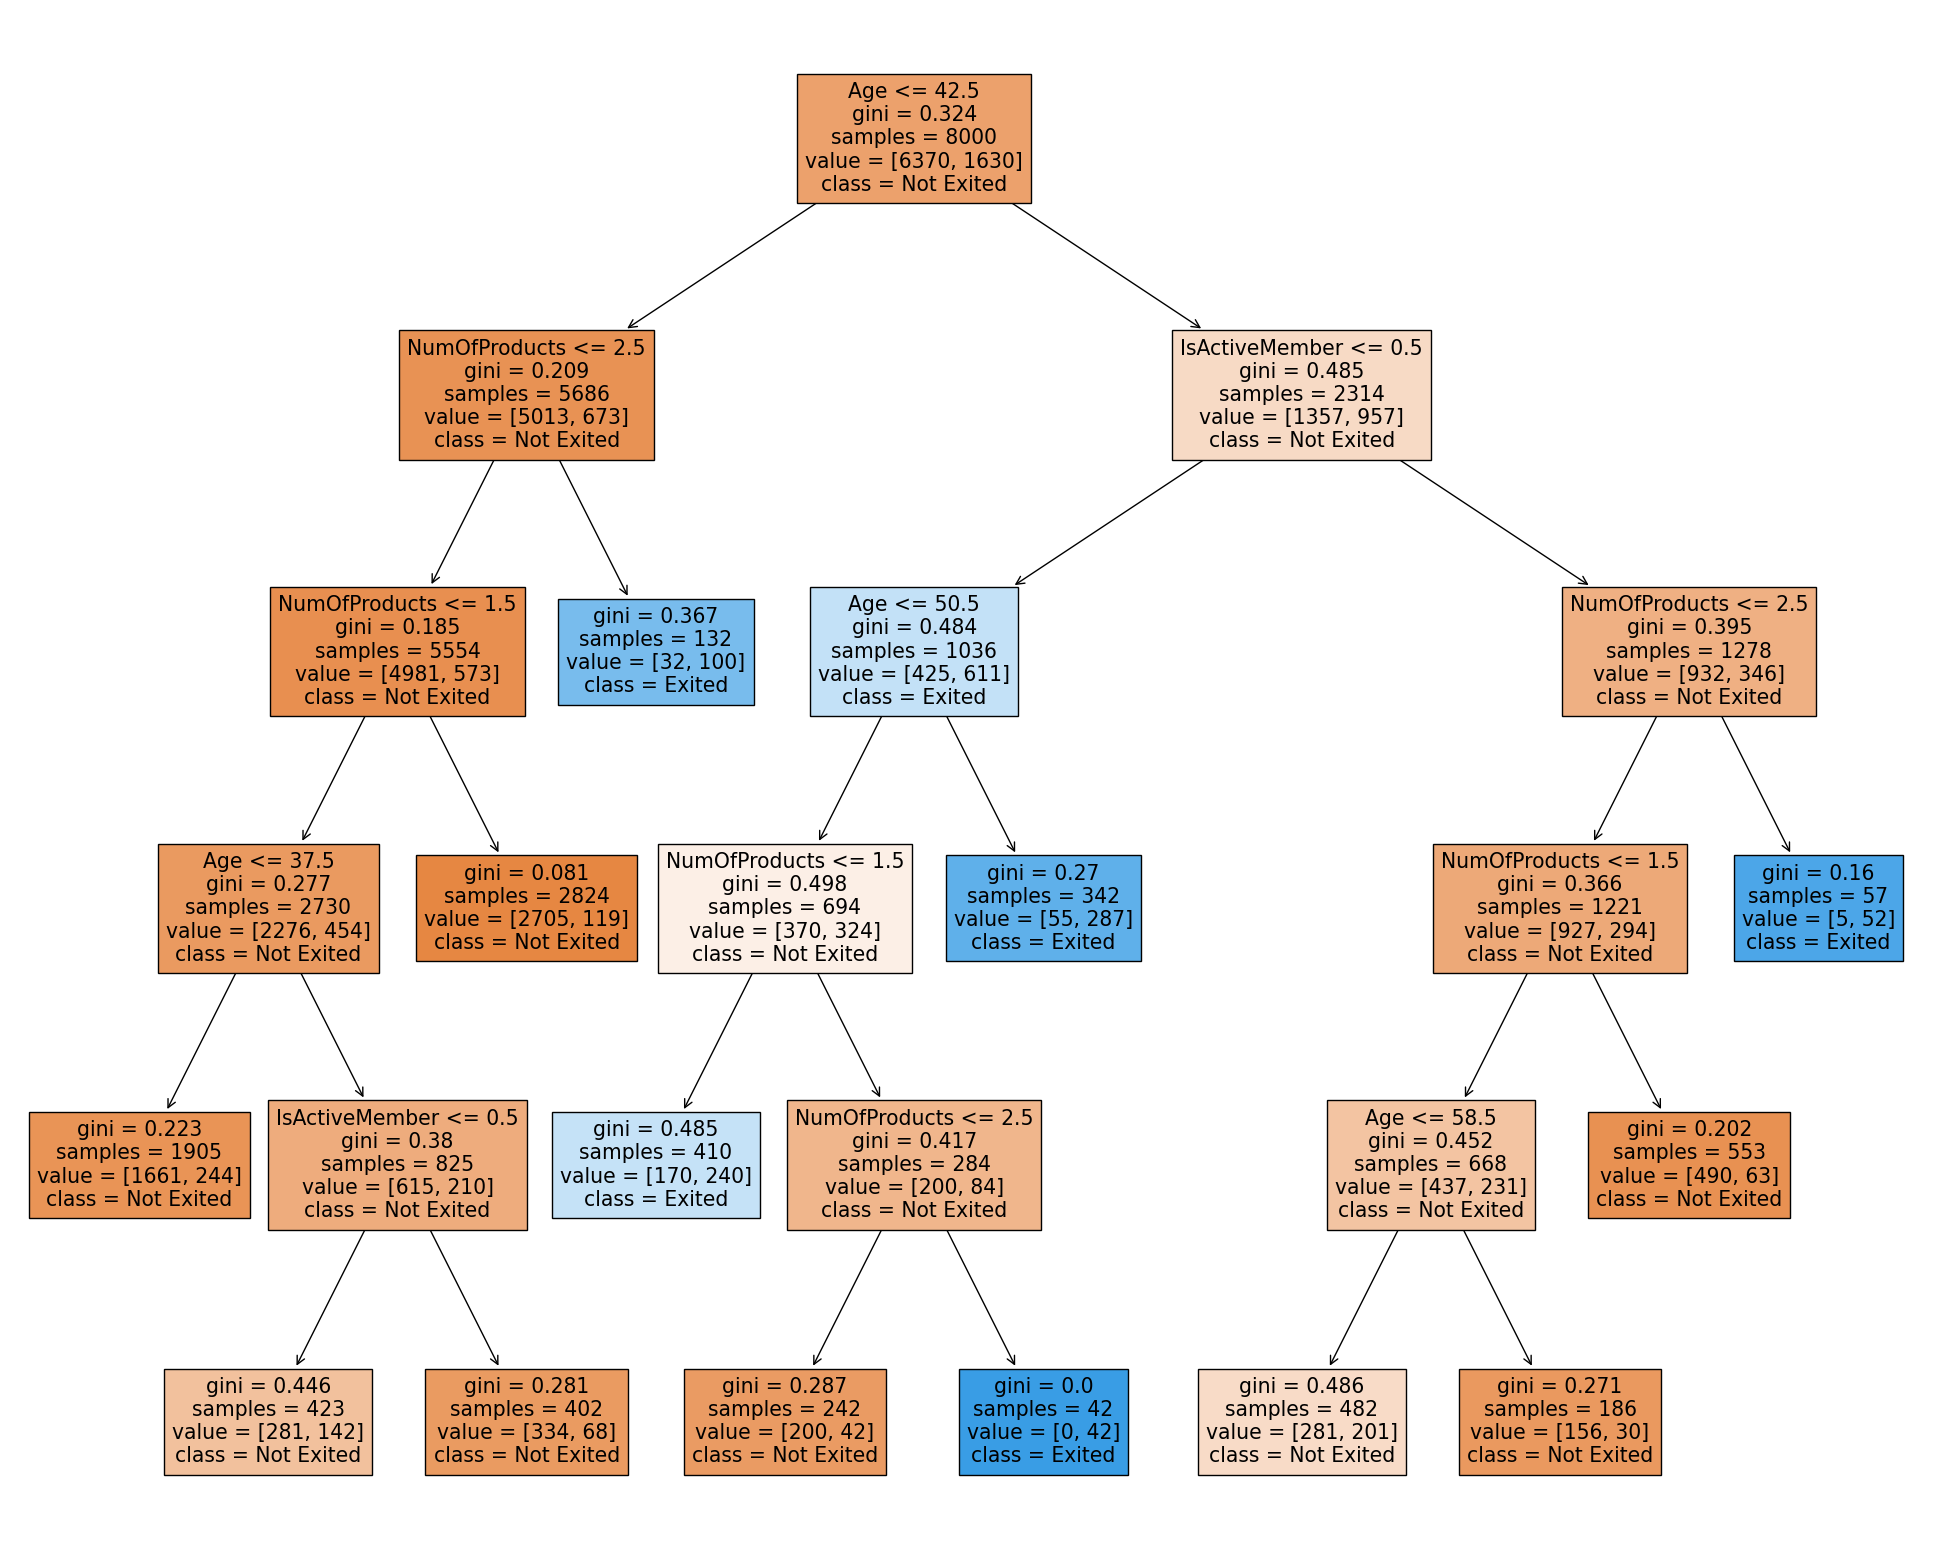

In [39]:
classifier = DecisionTreeClassifier(ccp_alpha=0.000915)  
classifier.fit(X_train, y_train) 
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, class_names=['Not Exited','Exited'],feature_names=['CreditScore', 'Tenure', 'Age', 'NumOfProducts', 'IsActiveMember'], filled=True)
y_pred = classifier.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred))

In [40]:
# Test Accuracy olarak 0.8585 değeri elde edilmiştir.

NOT

Daha "complex", daha hassas bir ölçüm yapılmak istenirse, bu modellerin üstüne "Bagging, Random Forest, Boosting" gibi "process"ler uygulanabilir.

Uygulanan üç method arasında en yüksek "accuracy" değerini veren yöntem "Classification Tree" methodu olmuştur.

Proje bazında genel yaklaşım şu şekildedir:

1) Tabloda, NaN veya buna eş değeri olan "input" olup olmadığı test edilmiştir.
2) Scikit-Learn numeric değerlerle çalıştığı için object sınıfları numeric sınıflarla değiştirilmiştir.
3) Her bir feature için tablo üzerinde inceleme yapılmıştır.
3) Classification problemi olduğu için buna uygun methodlar seçilmiştir.
4) Uygun feature seçimleri için çeşitli yöntemler uygulanmıştır.
5) Train - test ayrımı yapılarak veri sızımı engellenmiştir. Daha tutarlı tahminler yapabilmek için validation yapılmıştır.
6) Uygun değerleri bulmak için her zaman validation yöntemi kullanılmıştır.
7) "Classification problemi olduğu için ML prediction"da "accuracy" yöntemi tercih edilmiştir.